<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab1(AML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("/content/Program_1_Dataset.csv")
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.shape

(506, 14)

<Axes: >

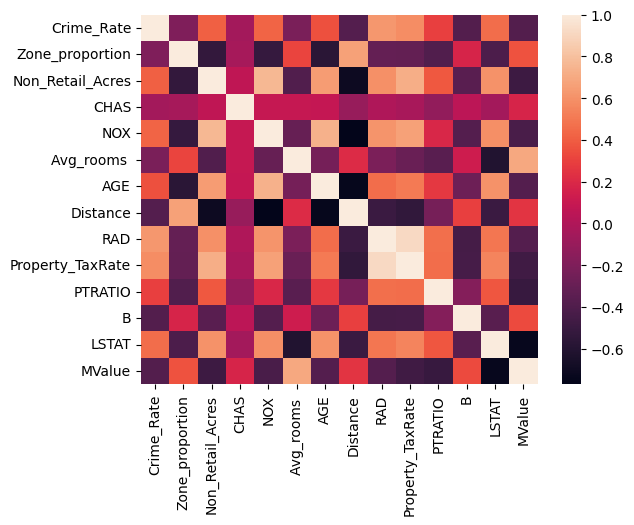

In [6]:
sns.heatmap(data.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec8550b3850>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec8550b11e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec8550b0ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec8550b1ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec8550b2830>],
 'means': []}

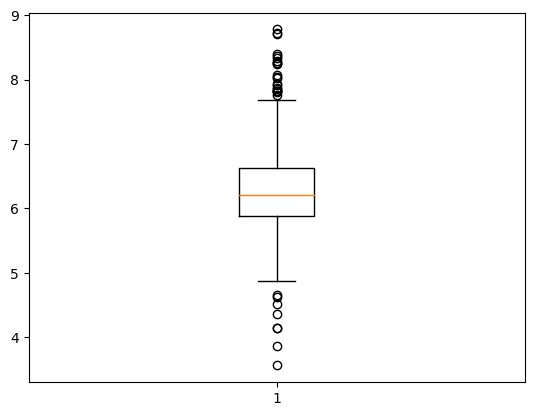

In [23]:
plt.boxplot(data["Avg_rooms "])

In [24]:
Q1 = data["Avg_rooms "].quantile(0.25)
Q3 = data["Avg_rooms "].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 -(width*IQR)
upper = Q3 + (width*IQR)
data["Avg_rooms "]=np.where(data["Avg_rooms "]>upper,upper,np.where(data["Avg_rooms "]<lower,lower,data["Avg_rooms "]))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec85424d210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec85424c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec85424f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec85424d4b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec85424d750>],
 'means': []}

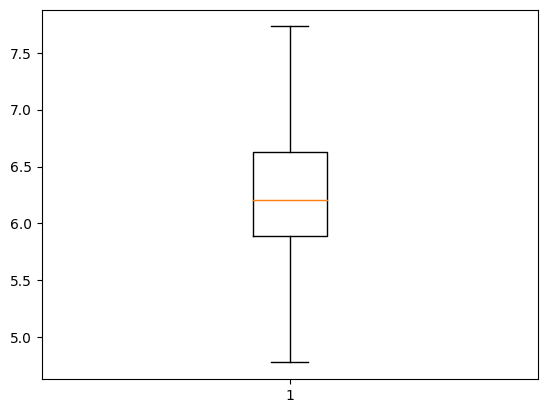

In [49]:
plt.boxplot(data["Avg_rooms "])

In [25]:
#Taking Avg_rooms as predictor and MValue as the target variable
X = data[['Avg_rooms ']]
Y = data['MValue']

**Scatter Plot of Dependent vs Independent Variable**

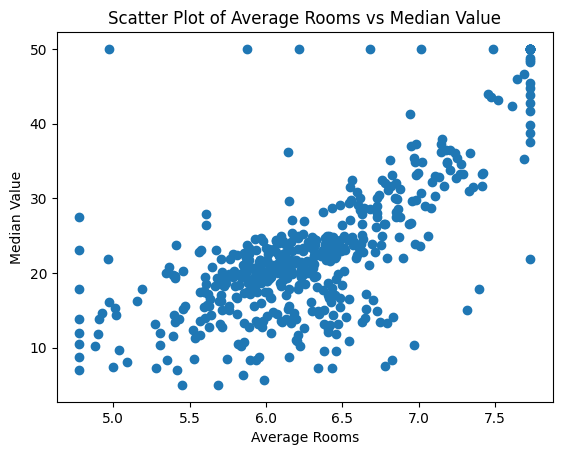

In [26]:
plt.scatter(X,Y)
plt.xlabel("Average Rooms")
plt.ylabel("Median Value")
plt.title("Scatter Plot of Average Rooms vs Median Value")
plt.show()

As we can see that there is a linear relationship between Avg_rooms and MValue which satisfies the linear relation assumption of linear regression

**Splitting the Dataset into Training and Testing Set**

In [35]:
#Splitting the dataset into training and testing set in a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

**Building Logistic Regression Model from Scratch**

In [41]:
x = data['Avg_rooms ']
y = data['MValue']
xy = x*y
n = len(data)
xmean = data['Avg_rooms '].mean()
ymean = data['MValue'].mean()
num = xy.sum() - n*xmean*ymean
den = (x**2).sum() - n*(xmean**2)
m = num/den
c = ymean - m*xmean
print("Intercept:",c,",Slope:",m)

Intercept: -41.727913564810684 ,Slope: 10.24024260443214


In [43]:
data["Predicted_MValue"] = m*data["Avg_rooms "] + c
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue,Predicted_MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,34.213726
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5,27.158198
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5,27.711172
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6,23.860840
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3,21.116455


Text(0.5, 1.0, 'Best Fit Model')

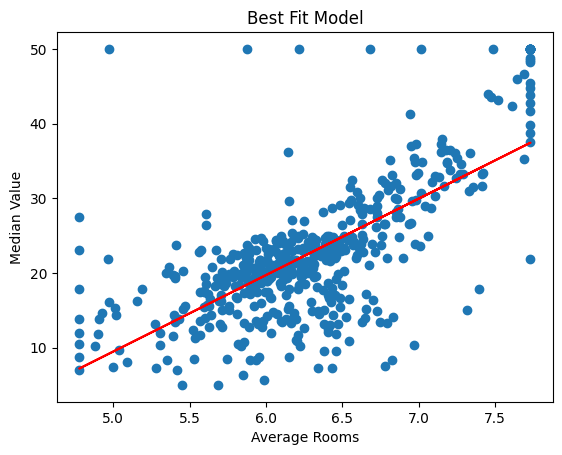

In [45]:
fig, ax = plt.subplots()
ax.scatter("Avg_rooms ","MValue",data=data,label="Actual Median Value")
ax.plot(data["Avg_rooms "],data["Predicted_MValue"],color="red",label="Predicted Median Value")
ax.set_xlabel("Average Rooms")
ax.set_ylabel("Median Value")
ax.set_title("Best Fit Model")

**Building a Logistic Regression Model using sklearn**

In [36]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_test,y_test))

0.5339825662899653


In [37]:
y_pred = reg.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.head()

,Actual,Predicted
363,22.9,19.936863
458,7.2,23.118628
2,26.5,27.328940
69,23.8,22.887926
459,12.1,23.704996


In [38]:
print("Model Intercept",reg.intercept_)
print("Model Slope",reg.coef_)

Model Intercept -37.85399103367867
Model Slope [9.6125838]


**Model Evaluation**

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#MAE is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
mae = mean_absolute_error(y_test,y_pred)
#MSE measures the average of the squares of the errors
mse = mean_squared_error(y_test,y_pred)
#RMSE measures the average difference between values predicted by a model and the actual values
rmse = np.sqrt(mse)

In [47]:
print(f'The Mean Absolute error:{mae:.2f}')
print(f'The Mean Squared Error:{mse:.2f}')
print(f'The Root Mean Squared Error:{rmse:.2f}')

The Mean Absolute error:4.79
The Mean Squared Error:46.79
The Root Mean Squared Error:6.84


In [48]:
from sklearn.metrics import r2_score,explained_variance_score
r2 = r2_score(y_test,y_pred)
#It is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable
print("The R-Squared value is ",r2)

The R-Squared value is  0.5339825662899653


The R-squared value ranges from 0 to 1. The better the R-Squared value, the better the model has fitted the data

**Model Evaluation**

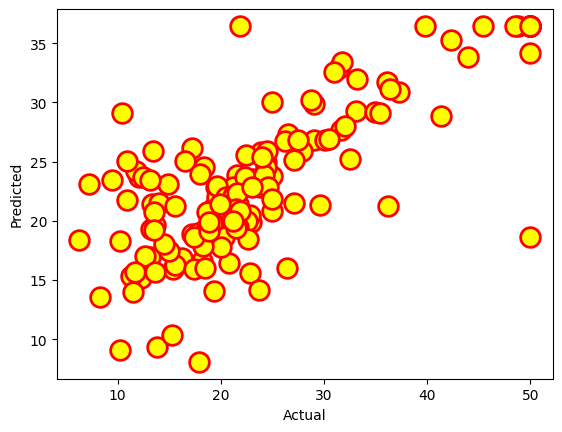

In [50]:
plt.scatter(df_preds['Actual'],df_preds['Predicted'],c='yellow',linewidths=2,edgecolor='red',s=200)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Inference**

The Linear Regression has only been trained on one predictor variable. If we use multiple predictor variables, the score of the model might increase. The predictors must obey the basic assumptions of multiple linear regression such as homoscedasicity, multicolinearity, linear independence and so on.